In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
import seaborn as sns
%matplotlib inline
#import yfinance as yf

#from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
#path equals etc... 

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AAPL", "QQQ", "ARKK", "XLB", "XLC", "XLE", "XLF", "XLI", "XLK", "XLP", "XLRE", "XLU", "XLV", "XLY"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_portfolio.head()

AAPL                                     ARKK  \
                             open    high     low   close    volume   open   
time                                                                         
2017-05-01 00:00:00-04:00  145.10  147.20  144.96  146.56  25669350  25.48   
2017-05-02 00:00:00-04:00  147.54  148.09  146.84  147.47  31308344  25.91   
2017-05-03 00:00:00-04:00  145.59  147.49  144.27  147.06  38855247  25.75   
2017-05-04 00:00:00-04:00  146.55  147.14  145.81  146.54  18926882  25.74   
2017-05-05 00:00:00-04:00  146.76  148.98  146.76  148.96  22675122  25.77   

                                                             ...    XLV  \
                              high      low    close volume  ...   open   
time                                                         ...          
2017-05-01 00:00:00-04:00  25.7199  25.3504  25.7100  35949  ...  75.63   
2017-05-02 00:00:00-04:00  25.9100  25.5700  25.6699  21238  ...  75.74   
2017-05-03 00:00:00-04:00  25.7700  25.4500  25.6012   7956  ...  75.65   
2017-05-04 00:00:00-04:00  25.7400  25.4019  25.5000  13170  ...  75.77   
2017-05-05 00:00:00-04:00  25.7700  25.5000  25.7600  12850  ...  76.18   

                                                            XLY         \
                             high    low  close   volume   open   high   
time                                                                     
2017-05-01 00:00:00-04:00  75.815  75.50  75.65  6277299  90.26  90.52   
2017-05-02 00:00:00-04:00  75.900  75.30  75.84  4838610  90.23  90.28   
2017-05-03 00:00:00-04:00  75.710  75.34  75.54  5365962  90.21  90.45   
2017-05-04 00:00:00-04:00  76.010  75.66  75.99  3751031  89.82  89.82   
2017-05-05 00:00:00-04:00  76.200  75.66  75.95  5273320  89.97  90.15   

                                                       
                               low   close     volume  
time                                                   
2017-05-01 00:00:00-04:00  90.0741  90.150  5514250.0  
2017-05-02 00:00:00-04:00  89.7500  90.270  3670657.0  
2017-05-03 00:00:00-04:00  89.4900  89.735  2550942.0  
2017-05-04 00:00:00-04:00  89.2700  89.640  3346966.0  
2017-05-05 00:00:00-04:00  89.5300  90.150  2815005.0  

[5 rows x 70 columns]

In [6]:
#df_portfolio.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
port_data = pd.DataFrame()

for c in df_portfolio.columns:
    if c[1] in "close":
        port_data[c[0]] = df_portfolio[c[0]][c[1]]

In [7]:
#clean data & find the daily returns of each stock in the portfolio & ETFs
port_data.index= port_data.index.date

port_data= port_data.pct_change()
port_data= port_data.dropna()

In [8]:
#sep data
etf_tickers= ["XLB", "XLC", "XLE", "XLF", "XLI", "XLK", "XLP", "XLRE", "XLU", "XLV", "XLY"]
etf_data= port_data.loc[:,etf_tickers]
port_data= port_data.drop(columns= etf_tickers)
print(etf_data)


                 XLB       XLC       XLE       XLF       XLI       XLK  \
2018-06-20 -0.003759  0.012410  0.004684 -0.003472  0.000273  0.002521   
2018-06-21 -0.010292 -0.006129 -0.019446 -0.001834 -0.012012 -0.007823   
2018-06-22  0.013692  0.004376  0.021597 -0.005328  0.003040 -0.003098   
2018-06-25 -0.014703 -0.020598 -0.021939 -0.010344 -0.012397 -0.020621   
2018-06-26  0.003644  0.001662  0.013866 -0.003733  0.003208  0.003750   
...              ...       ...       ...       ...       ...       ...   
2020-04-27  0.025878  0.008429  0.021695  0.034959  0.025341  0.009141   
2020-04-28  0.019554 -0.018145  0.022933  0.009778  0.018536 -0.013643   
2020-04-29  0.025316  0.049211  0.076391  0.029489  0.019599  0.041043   
2020-04-30 -0.029929 -0.005541 -0.024428 -0.026507 -0.021510 -0.004356   
2020-05-01 -0.020054 -0.014328 -0.056668 -0.031840 -0.028531 -0.027784   

                 XLP      XLRE       XLU       XLV       XLY  
2018-06-20  0.001175  0.011111  0.000199  0.0021

In [9]:
#concat the portfolio into total returns
weights=[1/3, 1/3, 1/3]
weighted_return= (weights * port_data)
portfolio_return = weighted_return.sum(axis=1)
portfolio_return.head()

2018-06-20    0.010050
2018-06-21   -0.012780
2018-06-22   -0.006185
2018-06-25   -0.021779
2018-06-26    0.009043
dtype: float64

In [10]:
port_corr= pd.concat([portfolio_return, etf_data], axis="columns", join="inner")
port_corr.head()

,0,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
2018-06-20,0.010050,-0.003759,0.012410,0.004684,-0.003472,0.000273,0.002521,0.001175,0.011111,0.000199,0.002121,0.004742
2018-06-21,-0.012780,-0.010292,-0.006129,-0.019446,-0.001834,-0.012012,-0.007823,0.001761,0.005965,0.003384,-0.005527,-0.007213
2018-06-22,-0.006185,0.013692,0.004376,0.021597,-0.005328,0.003040,-0.003098,0.008203,0.008115,0.006944,0.004139,-0.001345
2018-06-25,-0.021779,-0.014703,-0.020598,-0.021939,-0.010344,-0.012397,-0.020621,0.004843,-0.002012,0.016749,-0.008951,-0.021825
2018-06-26,0.009043,0.003644,0.001662,0.013866,-0.003733,0.003208,0.003750,-0.004049,0.005429,0.000000,-0.002971,0.006978


In [11]:
#run correlation
correlation= port_corr.corr()
correlation

,0,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
0,1.000000,0.810104,0.914256,0.707919,0.804526,0.838906,0.965780,0.676918,0.674009,0.558544,0.842063,0.916661
XLB,0.810104,1.000000,0.783508,0.812236,0.903736,0.926996,0.841597,0.745805,0.770583,0.693218,0.824920,0.871291
XLC,0.914256,0.783508,1.000000,0.694848,0.795328,0.806673,0.919797,0.698881,0.679771,0.568118,0.822157,0.893735
XLE,0.707919,0.812236,0.694848,1.000000,0.832277,0.834334,0.722535,0.572119,0.639366,0.528981,0.695733,0.763368
XLF,0.804526,0.903736,0.795328,0.832277,1.000000,0.920317,0.847541,0.753437,0.786245,0.694159,0.822474,0.871686
XLI,0.838906,0.926996,0.806673,0.834334,0.920317,1.000000,0.869379,0.754333,0.777910,0.685602,0.842302,0.899747
XLK,0.965780,0.841597,0.919797,0.722535,0.847541,0.869379,1.000000,0.750725,0.718372,0.631751,0.872465,0.921794
XLP,0.676918,0.745805,0.698881,0.572119,0.753437,0.754333,0.750725,1.000000,0.813489,0.844180,0.828537,0.729687
XLRE,0.674009,0.770583,0.679771,0.639366,0.786245,0.777910,0.718372,0.813489,1.000000,0.869561,0.787863,0.756431
XLU,0.558544,0.693218,0.568118,0.528981,0.694159,0.685602,0.631751,0.844180,0.869561,1.000000,0.749865,0.631574


'\nIndustry=\n    XLB- Materials\n    XLC- Telecommunications \n    XLE- Energy\n    XLF- Financials\n    XLI- Industrials\n    XLK- Information Tech\n    XLP- Consumer Staples\n    XLRE- Real Estate\n    XLU- Utilities\n    XLV- Healthcare\n    XLY- Consumer Discretionary\n'

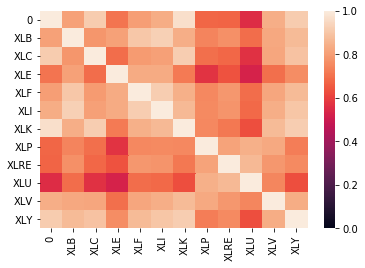

In [12]:
#correlation heatmap
sns.heatmap(correlation, vmin=0, vmax=1)
"""
Industry=
    XLB- Materials
    XLC- Telecommunications 
    XLE- Energy
    XLF- Financials
    XLI- Industrials
    XLK- Information Tech
    XLP- Consumer Staples
    XLRE- Real Estate
    XLU- Utilities
    XLV- Healthcare
    XLY- Consumer Discretionary
"""

In [13]:
###going to use at the end to compare starting returns vs adusted portfolio returns

#cumulative portfolio returns
cumprod_port= (1 + portfolio_return).cumprod()
cumprod_port.head()

2018-06-20    1.010050
2018-06-21    0.997141
2018-06-22    0.990973
2018-06-25    0.969391
2018-06-26    0.978157
dtype: float64

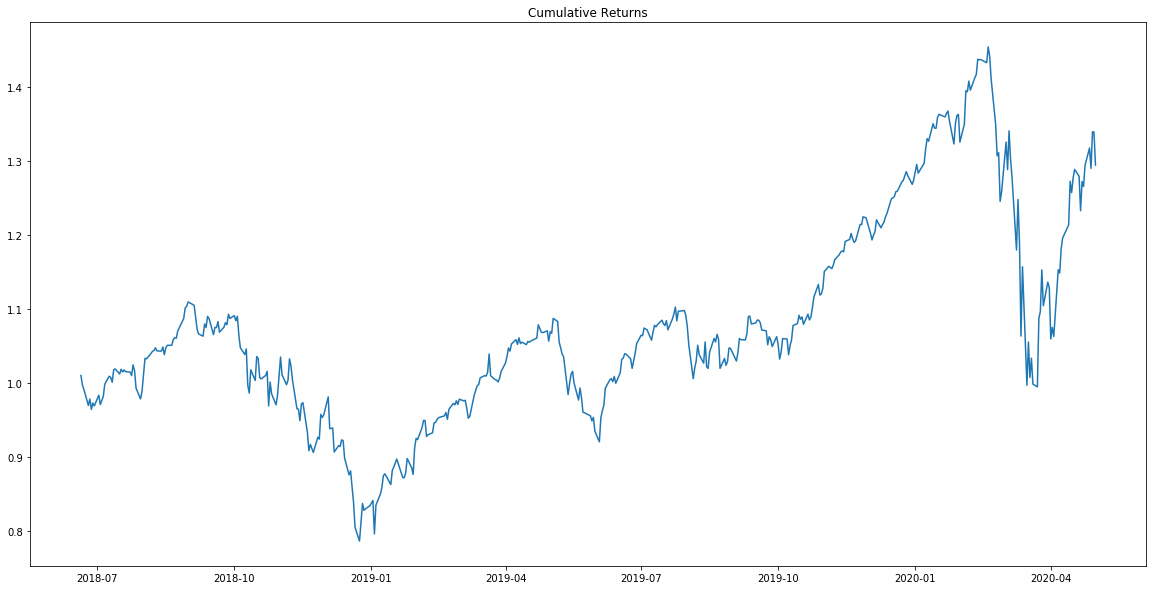

In [14]:
#plot portfolio returns
cumprod_port.plot(figsize=(20, 10), title="Cumulative Returns")